# **Bar Plot**

2014 yılındaki ilk 3 üniversitenin alıntı yapma ve öğretme değerlerini görselleştirmek amaçlanmaktadır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade plotly 

In [ ]:
!pip install jupyter-dash

In [4]:
timesData = pd.read_csv("/content/drive/MyDrive/data/timesData.csv")

In [5]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


Plotly'da bir kalıp vardır. Bu kalıp doğrultusunda görselleştirme yapılır.

kullanılan kalıp;

**trace** kısmı oluşturulurken

*   **x** = x eksenine koyulacak sütun yazılır.
*   **y** = x eksenine koyulacak sütun yazılır.
*   **mode** = kullanılacak plotun türüdür.
*   **name** = trace'in adıdır, kenarda hangi renkte hangi verinin kullanıldığının bilgisini verir.
*   **marker** = dictionarylerle birlikte kullanılır, renk ve saydamlık belirlenir.
*   **text** = plotun üzerinde gezinirken değerin ait olduğu bilgidir.

**data** = traceler eklendiği listedir.

**layout** = dictionarydir ve içerisinde şunları barındırır;
*   **title** = başlık bilgisi
*   **x axis** = bir dictionarydir ve içerisinde şunları barındırır;
  *   **title** = x ekseninin adı
  *   **ticklen** = x eksenindeki başlığın kalınlığı
  *   **zeroline** = False olduğunda sıfırdan geçen çizgiler devre dışı bırakılır.

**fig** = datayı ve layoutu içeren bir figür oluşturulur.

**iplot()** = içerisinde data ve layout bulunan figür plot edilir.














In [6]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:] #2014 yılındaki ilk 3 üniversite seçilerek bir filtre oluşturulur, bu filtre dataya uygulanır.
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [7]:
#create trace1
trace1 = go.Bar( #Bar türü seçilir.
                x = df2014.university_name, #x eksenine üniversite isimleri koyulur.
                y = df2014.citations,  #y eksenine alıntı değerleri koyulur.
                name = "citations",    #trace'in adı verilir.
                marker = dict(color = 'rgba(255, 174, 255, 0.5)', #renk ve saydamlık verilir.
                             line=dict(color='rgb(0,0,0)',width=1.5)), #bar plotun çevresindeki renk ve çevresinin kalınlığı
                text = df2014.country) #değerin üzerine gelindiğinde hoverda ülke adı yazır.

# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,  #x eksenine üniversite isimleri koyulur.
                y = df2014.teaching,    #y eksenine öğretme değerleri koyulur.
                name = "teaching",      #trace'in adı verilir.
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',   #renk ve saydamlık verilir.
                              line=dict(color='rgb(0,0,0)',width=1.5)), #bar plotun çevresindeki renk ve çevresinin kalınlığı
                text = df2014.country)   #değerin üzerine gelindiğinde hoverda ülke adı yazır.

data = [trace1, trace2] #trace1 ve trace2 data değişkenine liste olarak atanır.

layout = go.Layout(barmode = "group") #barmode -> trace1 ve trace2'nin nasıl koyulacağının modudur.
                                      #group moduyla iki trace yan yana koyulur.

fig = go.Figure(data = data, layout = layout) #data parametresine data değişkeni, layout parametresine layout değişkeni atanarak figür oluşturulur.

iplot(fig) #figür plot edilir.

Github'da Ipython kernel olmadığı için pyplot görselleştirmeleri 
gözükmemektedir. Bu yüzden png formatında yüklenmiştir.

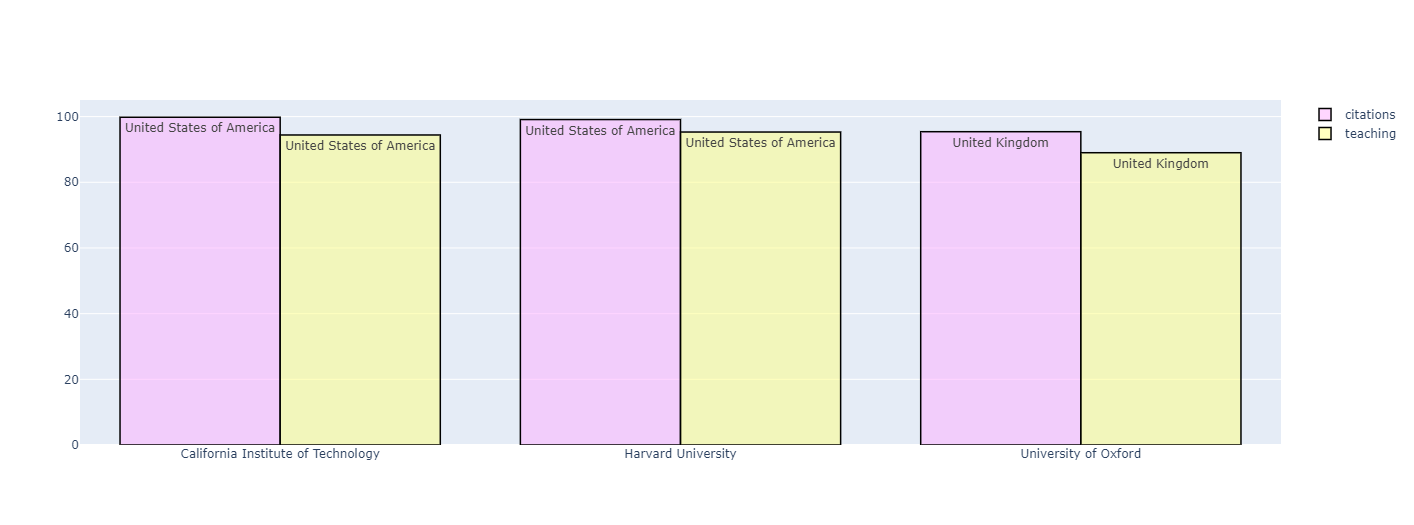

Bar plot görselleştirmesi seaborn'da yapılsaydı yaklaşık değerler görülürdü. Plotly'da tam değer gözükür.

In [8]:
x = df2014.university_name

trace1 = { #burada bir dictionary yaratılır.
  'x': x, #x eksenine üniversite adı koyulur.
  'y': df2014.citations, #y eksenine alıntı değerleri koyulur.
  'name': 'citation', #trace'in adı verilir.
  'type': 'bar'  #plot türü belirlenir.
};
trace2 = {
  'x': x,  #x eksenine üniversite adı koyulur.
  'y': df2014.teaching,  #y eksenine alıntı değerleri koyulur.
  'name': 'teaching',   #trace'in adı verilir.
  'type': 'bar'  #plot türü belirlenir.
};

data = [trace1, trace2]; #trace1 ve trace2 data değişkenine liste olarak atanır.

layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',  #trace1 ve trace2 alt alta koyulur.
  'title': 'citations and teaching of top 3 universities in 2014'
};

fig = go.Figure(data = data, layout = layout) #data parametresine data değişkeni, layout parametresine layout değişkeni atanarak figür oluşturulur.

iplot(fig) #figür plot edilir.

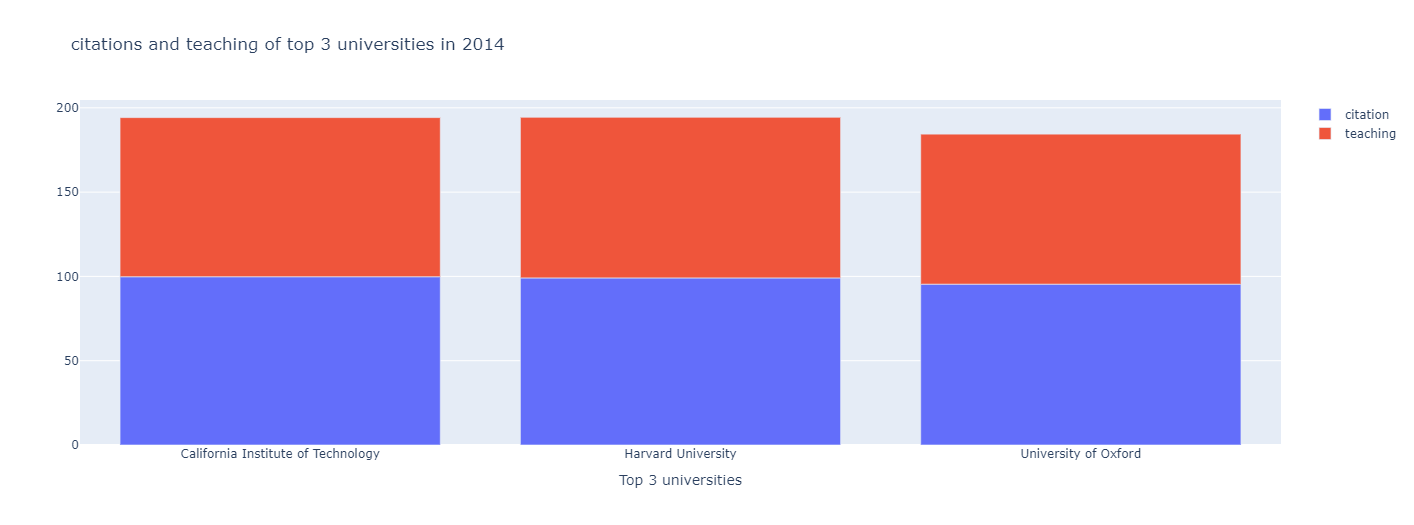

Bu bar plot görselleştirmesinde aynı konu üzerinde görselleştirme yapılmıştır.

Farklı bir syntax kullanılmıştır.

**barmode=group** olduğunda trace1 ve trace2 yan yana gözükür.

**barmode=relative** olduğunda trace1 ve trace2 alt alta gözükür.